# IGN DATA ANALYSIS and PREDICTIVE MODELLING
`
By- Pranay Mathur
`

### Imports Required
Notebook Requires: Python 2.7, Jupyter Notebook, numpy, sklearn, pandas

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_curve, auc,f1_score
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
warnings.filterwarnings("ignore")

###### Load Dataset from Directory. Dropped Duplicates, release_day and url column as they are not useful for analysis.

In [2]:
df=pd.read_csv('ign.csv')
df=df[df.columns[1:]]
df=df.drop('url',axis=1)
df=df.drop('release_day',axis=1)
df=df.drop_duplicates()
#replace target variable Y and N to 1 and 0
df.editors_choice=df.editors_choice.replace('Y',1)
df.editors_choice=df.editors_choice.replace('N',0)
df.head()

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,1,2012,9
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,1,2012,9
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,0,2012,9
3,Great,NHL 13,Xbox 360,8.5,Sports,0,2012,9
4,Great,NHL 13,PlayStation 3,8.5,Sports,0,2012,9


### Answers to First and Third Task: Analyze and list the platforms with the most "Editor's Choice" awards? and, What is Macintosh's average award count?

In [3]:
df2=df[['platform','editors_choice']]
df2=df2.groupby(['platform']).agg(['count','sum'])
df2.columns=df2.columns.droplevel()
df2.columns=['nGamesReleased','nEditorsChoice']
df2['Ratio']=df2.nEditorsChoice/df2.nGamesReleased
df2=df2.sort_values(by='nEditorsChoice',ascending=False).reset_index()
df2.to_csv("task1.csv",index=False)
df2[df2.nGamesReleased>10][df2.columns[:3]].head(10)

,platform,nGamesReleased,nEditorsChoice
0,PC,3365,678
1,Xbox 360,1629,366
2,PlayStation 3,1352,341
3,PlayStation 2,1685,314
4,Wireless,910,268
5,Xbox,819,210
6,Wii,1363,179
7,iPhone,841,152
8,PlayStation,938,122
9,GameCube,508,109


Table above demonstrates Platforms which received maximum Editor Choice Awards

###### Answer 1: Platform PC was awarded with Editors Choice the maximum times (678 times)



Table below demonstrates Platforms which received maximum Editor Choice Awards while taking the Ratio of awards recieved per games released

In [4]:
df2[df2.nGamesReleased>10].sort_values(by='Ratio',ascending=False).head(10)

,platform,nGamesReleased,nEditorsChoice,Ratio
18,Macintosh,81,40,0.493827
21,iPad,99,30,0.303030
4,Wireless,910,268,0.294505
25,Super NES,33,9,0.272727
26,N-Gage,30,8,0.266667
5,Xbox,819,210,0.256410
2,PlayStation 3,1352,341,0.252219
31,Master System,13,3,0.230769
19,PlayStation Vita,155,35,0.225806
1,Xbox 360,1629,366,0.224678


###### Answer 3: Macintosh has the highest ratio(~50%) of awards recieved per games released  

### Answer to Task Two: Does number of games by a platform in a given year have any effect on these awards?

In [5]:
df3=df[['platform','release_year','editors_choice']]
df3=df3.groupby(['platform','release_year']).agg(['count','sum'])
df3.columns=df3.columns.droplevel()
df3.columns=['nGamesReleased','nAwardsRecvd']
df3=df3.sort_values(by=['nAwardsRecvd'],ascending=False)
exceptions=df3[df3.nAwardsRecvd==0].sort_values('nGamesReleased',ascending=False)[:3]
df3=df3[df3.nAwardsRecvd!=0]
df3['Award_Ratio']=df3.nAwardsRecvd/df3.nGamesReleased
exceptions=exceptions.append(df3[df3.nGamesReleased>=10][df3.Award_Ratio<0.10])
exceptions=exceptions.sort_values("nGamesReleased",ascending=False)
exceptions.to_csv("task2exceptions.csv")
df3.to_csv("task2.csv")
df3[(df3.nGamesReleased>10) & (df3.Award_Ratio>0.10)].head(20)

nGamesReleased  nAwardsRecvd  Award_Ratio
platform      release_year                                           
Wireless      2004                     166            82     0.493976
PlayStation 2 2003                     221            68     0.307692
PlayStation 3 2011                     228            64     0.280702
Xbox 360      2010                     247            63     0.255061
              2011                     213            59     0.276995
PlayStation 3 2009                     214            59     0.275701
PC            2000                     266            58     0.218045
Wireless      2005                     204            58     0.284314
PC            2003                     203            57     0.280788
Xbox 360      2009                     271            56     0.206642
PlayStation 3 2008                     190            56     0.294737
PlayStation 2 2004                     231            55     0.238095
Wireless      2007                     208            54     0.259615
Xbox 360      2008                     247            53     0.214575
PC            2002                     191            52     0.272251
PlayStation 3 2010                     209            52     0.248804
Xbox          2003                     167            51     0.305389
PlayStation 2 2002                     231            48     0.207792
Xbox 360      2012                     170            47     0.276471
Xbox          2002                     149            47     0.315436

The general trend seen here is that if the no. of games that are released for a platform is large then the no. of awards recieved by games on that platform is high, this can be because of the the platforms being in a "trending" or "newly released" state such that game developing companies had tough competition to launch a successful game on that platform, which resulted in high quality games and awards.

A criteria of ratio >10% and no. of games released >10 was used to support this trend

However the trend seems to fail for some platforms, hence there are exceptions for this trend-

Nintendo DS shows a general to have very less games which have received awards, this can be seen through the table below.
Playstation 2 after 2007 became obsolete that might be the reason for less no. of awards
Lynx is a perfect exception, 77 games but no awards.
Other platforms may have become outdated/obsolete or they must be released in the 90's when both gaming industry and IGN was just starting to rise.

In [7]:
exceptions[[2,1,0]].head(20)

nGamesReleased  nAwardsRecvd  Award_Ratio
platform             release_year                                           
Nintendo DS          2008                     309            20     0.064725
                     2007                     261             9     0.034483
Game Boy Color       2000                     210            13     0.061905
PlayStation          1997                     170            13     0.076471
PlayStation 2        2008                     156             5     0.032051
PlayStation Portable 2007                     142            13     0.091549
PlayStation 2        2007                     136             7     0.051471
PlayStation          1996                     124             4     0.032258
Nintendo DS          2006                     124            10     0.080645
Game Boy Color       1999                      86             5     0.058140
Lynx                 1999                      77             0          NaN
Nintendo DSi         2011                      75             3     0.040000
Nintendo 64          1998                      72             7     0.097222
Game Boy Advance     2006                      61             1     0.016393
PlayStation 2        2009                      58             1     0.017241
Nintendo DSi         2009                      54             5     0.092593
Dreamcast            1999                      54             5     0.092593
GameCube             2006                      39             3     0.076923
Nintendo 64          1997                      35             3     0.085714
Genesis              2008                      29             1     0.034483

### Solution to Task 4: What is the optimal month for releasing a game?
`
From the table below it is seen Feb, March, August, September, October and November seems to be a nice time to release games. This can be supported by the high no. of games released during these months, high average score and large no. of awards.
September and October being the Top months to release a game, which also the real case in the gaming industry.
`

In [8]:
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
df4=df[['release_month','score','editors_choice']]
df4=df4.groupby(['release_month']).agg(['mean','count'])
df4.columns=df4.columns.droplevel()
df4.columns=['AverageScore','nGamesReleased','AverageAwards','temp']
df4["Month"]=month_list
df4=df4[[4,1,0,2]].reset_index(drop=True)
df4.AverageAwards=df4.AverageAwards*100
df4.AverageAwards=df4.AverageAwards.astype(int)
df4

,Month,nGamesReleased,AverageScore,AverageAwards
0,January,1125,6.699200,16
1,February,1325,6.996981,21
2,March,1568,7.022513,22
3,April,1261,6.890960,16
4,May,1140,6.859737,16
5,June,1481,6.937812,17
6,July,1187,6.853075,15
7,August,1338,7.079895,20
8,September,1706,7.236635,23
9,October,2304,7.067839,20


Let's support the trends with some plots.
The 3 bar plots below supports that february, march, august, september, october is a nice to release games
This is visualized by plotting-

1. No. of Games Released each month for the past 20 years
2. Average Score of the Games Released each month for the past 20 years
3. Average no. of awards received each month for the past 20 years

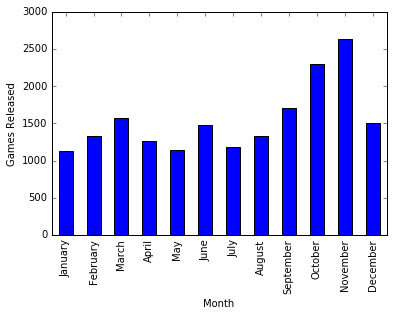

In [9]:
bar = df4[['nGamesReleased']].plot.bar(x=df4['Month'],legend=False)
bar.set_ylabel('Games Released')

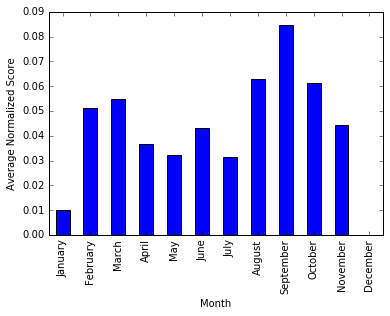

In [10]:
df4.AverageScore=((df4.AverageScore-df4.AverageScore.min())/df4.AverageScore.max())
bar1 = df4[['AverageScore']].plot.bar(x=df4['Month'],legend=False)
bar1.set_ylabel('Average Normalized Score')

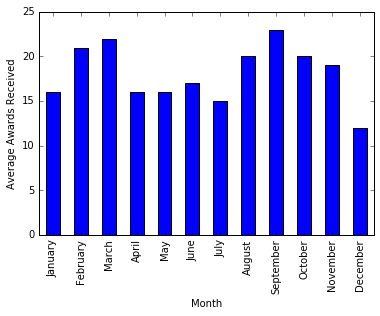

In [11]:
bar2 = df4[['AverageAwards']].plot.bar(x=df4['Month'],legend=False)
bar2.set_ylabel('Average Awards Received')

### Solution to task five: Analyze the percentage growth in the gaming industry over the years.
`
The gaming industry seems to decline after year 2008, the no. of games released gradually declined, or maybe IGN now started to filter out less significant games before publishing them on their website
This can be supported by the barplot below
`

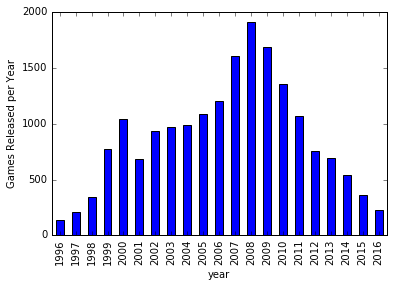

In [12]:
df5=df[['release_year','title']]
df5.columns=[['year','nGamesReleased']]
df5=df5.groupby('year').agg('count')[1:].reset_index()
df5["PercentageChange"]=df5.nGamesReleased.pct_change()*100
bar = df5[['nGamesReleased']].plot.bar(x=df5['year'], legend=False)
bar.set_ylabel('Games Released per Year')

The growth in the no. of games released seems a bit too erratic, but the trends which can be seen are in the initial years 1996 to 2000 the growth rate of the gaming industry was high and after 2008 as mentioned about the growth rate became negative.

This can be supported by the table and the bar plot below.

,year,nGamesReleased,PercentageChange
0,1996,135,NaN
1,1997,205,51.851852
2,1998,339,65.365854
3,1999,770,127.138643
4,2000,1045,35.714286
5,2001,688,-34.162679
6,2002,933,35.610465
7,2003,967,3.644159
8,2004,992,2.585315
9,2005,1088,9.677419


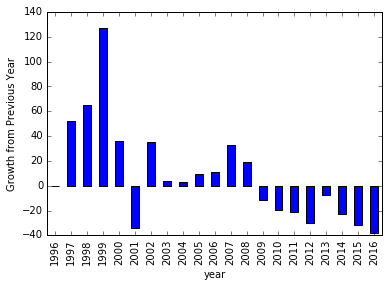

In [13]:
bar = df5[['PercentageChange']].plot.bar(x=df5['year'], legend=False)
bar.set_ylabel('Growth from Previous Year')
df5

###### Data Analysis phase over.

# Predictive Modeling
`
To predict whether a game will recieve Editors Choice Award or not!
`

Let's look at what is the relation between score, score_phrase, release_month on the Editor's Choice Award

In [14]:
attrib='score'
temp=df[[attrib,'editors_choice']]
temp=temp.groupby([attrib]).agg(['count','sum'])
temp.columns=temp.columns.droplevel()
temp.columns=['nGamesReleased','nEditorsChoice']
temp['Ratio']=temp.nEditorsChoice/temp.nGamesReleased
temp=temp.reset_index()
temp=temp.sort_values(by='score',ascending=False)
temp[temp.nEditorsChoice==0].head(20)

,score,nGamesReleased,nEditorsChoice,Ratio
71,7.9,370,0,0.0
70,7.8,465,0,0.0
69,7.7,249,0,0.0
68,7.6,183,0,0.0
67,7.5,1081,0,0.0
66,7.4,225,0,0.0
65,7.3,220,0,0.0
64,7.2,231,0,0.0
63,7.1,136,0,0.0
62,7.0,1563,0,0.0


The table above suggests that the editors_choice award is only given to score >= 8

The table below suggests editors_choice award is only given to Amazing, Great and Master Piece

Now we have a filtering criteria to decrease the no. of data records in the dataset

In [15]:
attrib='score_phrase'
temp=df[[attrib,'editors_choice']]
temp=temp.groupby([attrib]).agg(['count','sum'])
temp.columns=temp.columns.droplevel()
temp.columns=['nGamesReleased','nEditorsChoice']
temp['Ratio']=temp.nEditorsChoice/temp.nGamesReleased
temp=temp.reset_index()
temp=temp.sort_values(by='nEditorsChoice',ascending=False)
temp

,score_phrase,nGamesReleased,nEditorsChoice,Ratio
5,Great,4763,1776,0.372874
0,Amazing,1801,1683,0.934481
6,Masterpiece,55,50,0.909091
1,Awful,663,0,0.000000
2,Bad,1266,0,0.000000
3,Disaster,3,0,0.000000
4,Good,4723,0,0.000000
7,Mediocre,1956,0,0.000000
8,Okay,2937,0,0.000000
9,Painful,339,0,0.000000


#### Feature Engineering Phase
`
Most awards are given in the peak month hence there can be a new feature called "PeakSeason" peak months being October, September, August, March, Feb from the Data Analysis Phase.
Creating feature PeakSeason PeakSeason=0 for non peak months otherwise 1
Most important features for the prediction is the score, platform, year, month and PeakSeason as they are obvious estimators of the the awards received, which is seen in the data analysis phase.
If not modelled as predictive modelling task then score, platform, month and year are sufficient to guess whether the game will recieve award or not, hence they are important contributor to this predictive model.
score>8 implies high probability of being editors choice
`

In [16]:
peaks=[10,9,3,2,8]#month no.s
df["PeakSeason"]=0
for peak in peaks:
    df["PeakSeason"][df.release_month==peak]=1

Filtering out the records with score less than 8 or score phase not equal to Amazing, Masterpiece and Great.

In [17]:
df=df[(df.score_phrase=="Amazing") | (df.score_phrase=="Masterpiece") | (df.score_phrase=="Great")]
df.head(10)         #now we only have score >= 8

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,PeakSeason
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,1,2012,9,1
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,1,2012,9,1
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,0,2012,9,1
3,Great,NHL 13,Xbox 360,8.5,Sports,0,2012,9,1
4,Great,NHL 13,PlayStation 3,8.5,Sports,0,2012,9,1
7,Amazing,Guild Wars 2,PC,9.0,RPG,1,2012,9,1
13,Amazing,Mark of the Ninja,Xbox 360,9.0,"Action, Adventure",1,2012,9,1
14,Amazing,Mark of the Ninja,PC,9.0,"Action, Adventure",1,2012,9,1
17,Great,Avengers Initiative,iPhone,8.0,Action,0,2012,9,1
24,Amazing,Dark Souls (Prepare to Die Edition),PC,9.0,"Action, RPG",1,2012,8,1


Converting discrete features into distinct labels using label encoder
The features below are encoded because they are discrete values and should be converted to natural number range in order to normalize the whole dataset, so that our model can easily understand those features.

Chose Natural Number Range encoding over One-Hot Encoding due to better accuracy scores

In [18]:
le_sp=LabelEncoder() #Label Encoder for Score Phrase
df.score_phrase=le_sp.fit_transform(df.score_phrase)
le_p=LabelEncoder() #Label Encoder for Platform
df.platform=le_p.fit_transform(df.platform)
le_g=LabelEncoder() #Label Encoder for Genre
df.genre=le_g.fit_transform(df.genre)
le_y=LabelEncoder() #Label Encoder for Year
df.release_year=le_y.fit_transform(df.release_year)
le_s=LabelEncoder() #Label Encoder for score
df.score=le_s.fit_transform(df.score)
dfF=df[[1,0,2,3,4,6,7,8,5]]
dfF.head()

,title,score_phrase,platform,score,genre,release_year,release_month,PeakSeason,editors_choice
0,LittleBigPlanet PS Vita,0,30,10,42,17,9,1,1
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,0,30,10,42,17,9,1,1
2,Splice: Tree of Life,1,48,5,47,17,9,1,0
3,NHL 13,1,46,5,68,17,9,1,0
4,NHL 13,1,27,5,68,17,9,1,0


###### Stratified Split of Dataset into Train and Test (60% : 40%)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dfF[dfF.columns[:8]], dfF.editors_choice, test_size=0.4, random_state=0)

Training a Random Forest Classifier

`Ensemble Approach.
Trains multiple classification trees and gives the output based on the polling result of those classification trees. i.e the higher the no. of votes for a target variable the higher probability of the sample belonging to that target variable.
Randomness is introduced in training process through random feature selection as well as random records selection. Prevents Overfitting.
`

In [20]:
clf= RandomForestClassifier()
clf.fit(X_train[X_train.columns[1:]],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

predicted for test dataset

In [21]:
y_pred=clf.predict(X_test[X_test.columns[1:]])

In [22]:
print "Accuracy:",y_test[y_test==y_pred].shape[0]/float(y_test.shape[0])*100
print "F1 Score:",f1_score(y_test,y_pred)*100

Accuracy: 89.7658610272
F1 Score: 90.0623395673


Function to plot confusion matrix

In [23]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

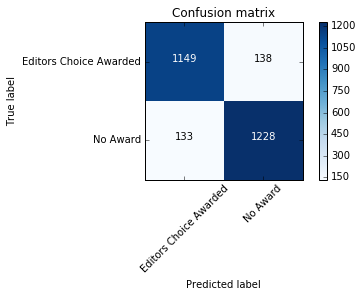

In [24]:
cnf_matrix=confusion_matrix(y_test,y_pred)
plt.figure()
class_names=["Editors Choice Awarded","No Award"]
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix')

False Positives and False Negatives are still there, but 90% F1 Score is achieved, the rest FP and FN are errors of the model.
Let's Check for overfitting, Area Under the Curve and True Positive vs False Positive Rates to evaluate our model a bit more.

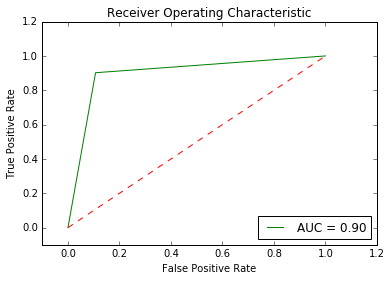

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve: depicting there is no overfitting and the AUC score is 90%. AUC >= 90% generally indicates a very good model.